## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
from keras.datasets import cifar10

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, num_output = 10, num_neurons = [512,256,128], drp_ratio=0.25):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i ,neurons in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = neurons,
                                    activation = "relu",
                                    name=f"Hidden_layer{i+1}")(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units = neurons,
                                    activation = "relu",
                                    name=f"Hidden_layer{i+1}")(x)
            x = Dropout(drp_ratio)(x)
    out = keras.layers.Dense(units = num_output,
                            activation = "softmax",
                            name="Output_layer")(x)
    
    model = keras.models.Model(inputs = input_layer, outputs = out)
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:],drp_ratio=Dropout_EXP)
ADAM = keras.optimizers.Adam(lr = LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=ADAM)
model.fit(x_train,y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        shuffle=True,
        validation_data=(x_test,y_test))

train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

results = {"train_loss":train_loss,
            "val_loss":val_loss,
            "train_acc":train_acc,
            "val_acc":val_acc}

c:\Users\wei-jyun\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 4s 20ms/step - loss: 2.0731 - accuracy: 0.2305 - val_loss: 1.8581 - val_accuracy: 0.3370
Epoch 2/50
196/196 [==============================] - 4s 18ms/step - loss: 1.8922 - accuracy: 0.3098 - val_loss: 1.7766 - val_accuracy: 0.3561
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 1.8393 - accuracy: 0.3326 - val_loss: 1.7215 - val_accuracy: 0.3843
Epoch 4/50
196/196 [==============================] - 4s 23ms/step - loss: 1.8089 - accuracy: 0.3425 - val_loss: 1.7188 - val_accuracy: 0.3897
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7648 - accuracy: 0.3589 - val_loss: 1.6827 - val_accuracy: 0.3956
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7429 - accuracy: 0.3657 - val_loss: 1.6507 - val_accuracy: 0.4097
Epoch 7/50
196/196 [==============================] - 5s 23ms/step - loss: 1.7258 - accuracy: 0.3758 - val_loss: 1.6307 - val_accuracy: 0.4267

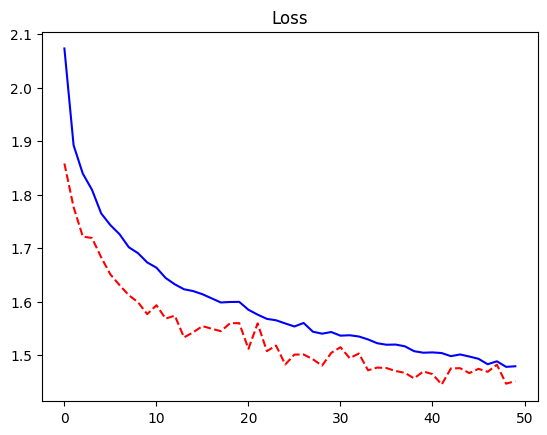

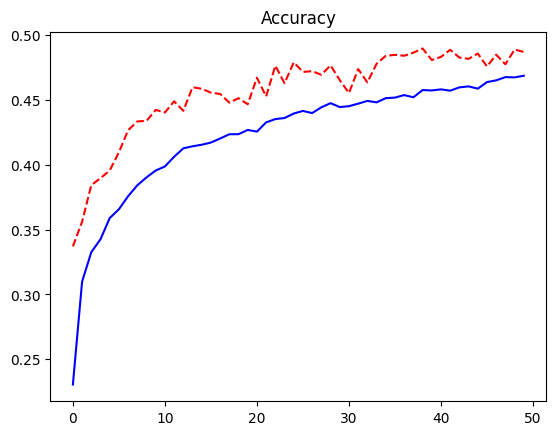

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(results["train_loss"])), results["train_loss"],"-",label="train_loss",c="b")
plt.plot(range(len(results["val_loss"])), results["val_loss"],"--",label="val_loss",c="r")
plt.title("Loss")
plt.show()

plt.plot(range(len(results["train_acc"])), results["train_acc"],"-",label="train_acc",c="b")
plt.plot(range(len(results["val_acc"])), results["val_acc"],"--",label="val_acc",c="r")
plt.title("Accuracy")
plt.show()
